#No Wine Left Behind

### By Alex Karwoski, August Stapf, Thomas Robinson, and Michael Bick

**Introduction**

While seeing relatives out in Oregon, one of our initial group members, Michael Leon, went around visiting vineyards and wineries on the Oregon countryside with his uncle. His uncle taught him the ins and outs of wine tasting, and what makes certain wines different from others in taste, quality, and other aspects. As we were looking around at public datasets to do our project, we came across the wine dataset, and after we heard his story, we were curious if wine quality could be determined based on the chemical components of the wine, as opposed to just a connoisseur's taste. All of our group members showed an interest in the topic, and we were all in to do our project on wine. 

Previous work using machine learning on the wine dataset is extensive in the literature [1-3]. Varied techniques have been used: from common classification techniques like k-nearest neighbors, random forests, and SVMs [2], to uncommon techniques like fuzzy ones [1-3]. In our project, we compare benchmark these techniques against more modern ones.

First, the team uses statistical methods to analyze the data and perform principal component analysis (PCA). Then, the team uses the best features from PCA in various classification and regression algorithms. Method one implements the k-means algorithm, where the assigned cluster mean wine quality is a predictor. 

[1] Escobet, Antoni, et al. “Modeling Wine Preferences from Physicochemical Properties Using Fuzzy 
Techniques .” Scitepress, pp. 1–7.

[2] Er, Yeşim & Atasoy, Ayten. (2016). The Classification of White Wine and Red Wine According to 
Their Physicochemical Qualities. International Journal of Intelligent Systems and Applications in Engineering. 23-23. 10.18201/ijisae.265954.

[3] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining 
from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Dataset**

The dataset contains the wine attributes: Fixed Acidity, Volatile Acidity, Citric Acid, Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide, Density, pH, Sulphates, Alcohol(% ABV), and the Quality. In conductiing our tests, we want to determine which of the attributes are more important in determining the quality of wine than others.

**Sample Data**

Below is an example of what the data for the physiochemical properties of the wine looks like. The first 11 columns are the separate chemical properties that we will be analyzing to see how they relate to the overall wine which is in the last column.

In [2]:
red_dataframe = pd.read_csv('winequality-red.csv', sep=';')
red_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Red Wine Information and Correlation Matrix**

Here we have information on each of the individual attributes of the red wines. The following information shows us the Averge, Standard Deviation, Min, Max, etc. Below that is the Correlation of each attribute to each other attribute

In [3]:
red_dataframe = pd.read_csv('winequality-red.csv', sep=';')
red_dataframe.drop('quality', axis=1).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


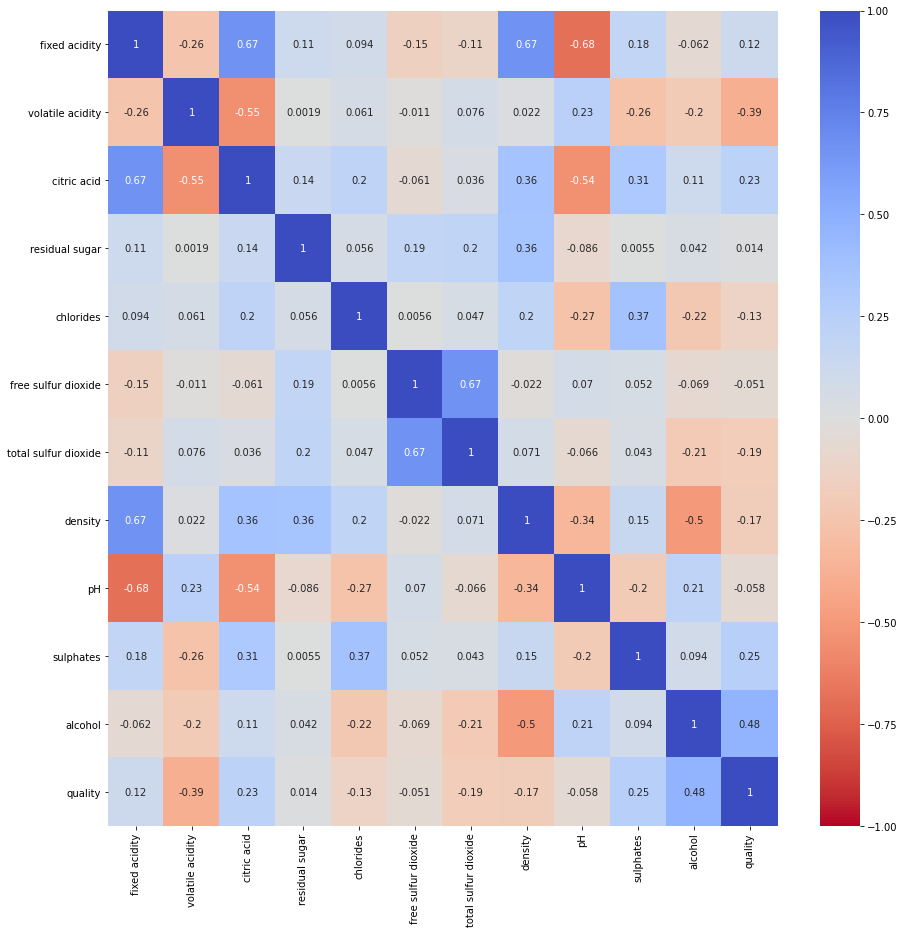

In [4]:
correlation = red_dataframe.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='coolwarm_r', vmin=-1, vmax=1, annot=True, ax=ax)

**White Wine Information and Correlation Matrix**

Here we have information on each of the individual attributes of the white wines. The following information shows us the Averge, Standard Deviation, Min, Max, etc. Below that is the Correlation of each attribute to each other attribute

In [5]:
white_dataframe = pd.read_csv('winequality-white.csv', sep=';')
white_dataframe.drop('quality', axis=1).describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


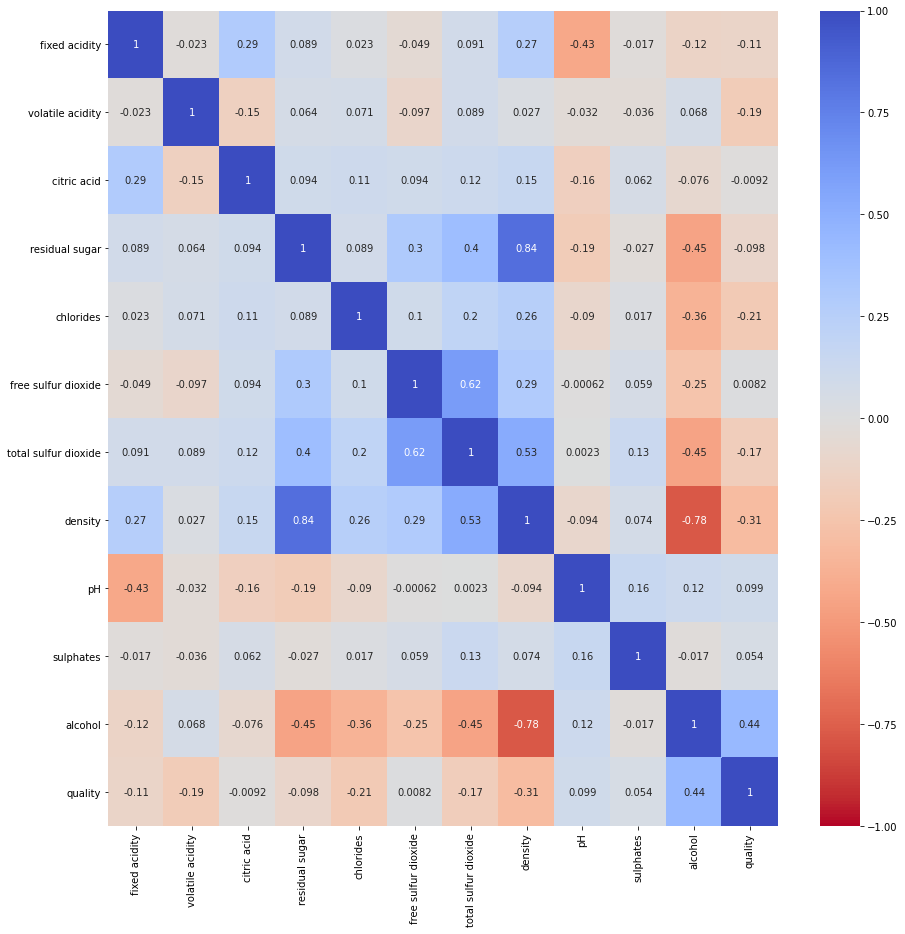

In [6]:
correlation = white_dataframe.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,cmap='coolwarm_r', vmin=-1, vmax=1, annot=True, ax=ax)

**Combined Wine Information and Correlation Matrix**

Here we have information on each of the individual attributes of the combined red and white wines. The following information shows us the Averge, Standard Deviation, Min, Max, etc. Below that is the Correlation of each attribute to each other attribute

In [7]:
both = [red_dataframe, white_dataframe]
both_dataframe = pd.concat(both)

both_dataframe.drop('quality', axis=1).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


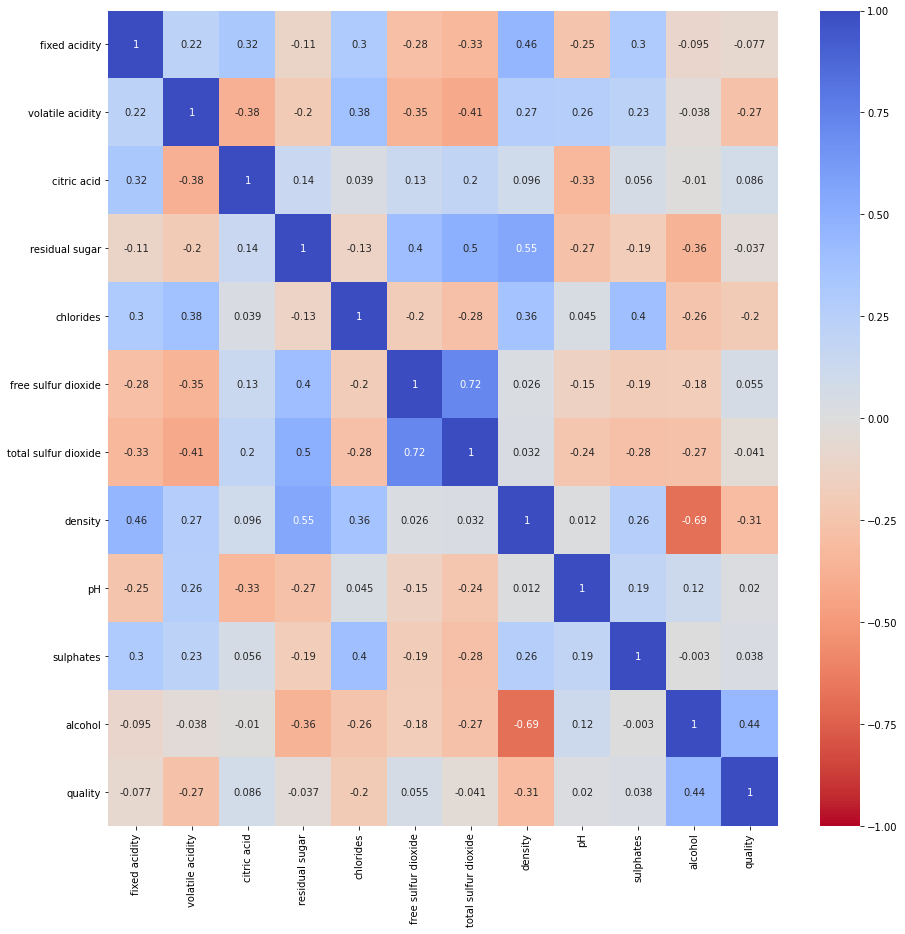

In [8]:
correlation = both_dataframe.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,cmap='coolwarm_r', vmin=-1, vmax=1, annot=True, ax=ax)

Steps:
Distribution:
  -Bar graph of distribution
  -Normalize Data

PCA Analyses to get the most important components
  -Visulaization
  -Short discussion and reasoning
Types of Anlayses to use and compare
LDA
Ridge Regression
  -Cross Validation
SVM

Precision Should be low:
Try Clustering with poor, good, great
GMM
K-means
Compare accuracy of models

Create Regression models within classes
Compare to original results




In [0]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
from math import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm
import os
from scipy import ndimage, misc
from matplotlib import pyplot as plt
import numpy as np
import imageio
from sklearn.datasets import load_boston, load_diabetes, load_digits, load_breast_cancer, load_iris, load_wine
%matplotlib inline
from sklearn.cluster import KMeans

data_red=np.genfromtxt("RedWine.csv", delimiter=',')
X_red = data_red[1:,:-1]
Y_red = data_red[1:,-1]


data_white=np.genfromtxt("WhiteWine.csv", delimiter=',')
X_white = data_white[1:,:-1]
Y_white = data_white[1:,-1]

Data Distribution

<BarContainer object of 10 artists>

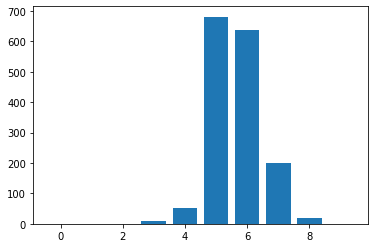

In [0]:
buckets = [0] * 10

for i in range(len(Y_red)):
  buckets[int(Y_red[i])] += 1

plt.bar(range(len(buckets)), buckets)

In [0]:
def plot_curve(x, y, color, label_x, label_y, curve_type='.', lw=2):
    plt.plot(x, y, curve_type, color=color, linewidth=lw, )
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.grid(True)

In [0]:
def pca(X):
    """
    Decompose dataset into principal components. 
    You may use your SVD function from the previous part in your implementation.
    
    Args: 
        X: N*D array corresponding to a dataset
    Return:
        U: N*N 
        S: min(N, D)*1 
        V: D*D
    """
    U, s, VT = np.linalg.svd(X)
    return U, s, VT

    
def intrinsic_dimension(S, recovered_variance=.99):
    """
    Find the number of principal components necessary to recover given proportion of variance
    
    Args: 
        S: 1-d array corresponding to the singular values of a dataset
        
        recovered_varaiance: float in [0,1].  Minimum amount of variance 
            to recover from given principal components
    Return:
        dim: int, the number of principal components necessary to recover 
            the given proportion of the variance
    """
    x = 0
    k = 0
    closed_list = []
    print(S.shape)
    open_list = np.copy(S).tolist()

    while x < .99:
      k = k + 1
      a = np.max(open_list)
      open_list.remove(a)  
      closed_list.append(a)
      x  = sum(closed_list)/sum(S)
    return k

def num_linearly_ind_features(S, eps=1e-11):
    """
    Find the number of linearly independent features in dataset
    
    Args: 
        S: 1-d array corresponding to the singular values of a dataset
    Return:
        dim: int, the number of linearly independent dimensions in our data
    """
    count = 0
    for val in S:
      if val > eps:
        count = count + 1
    return count
  

In [0]:
def visualize(X,y, color, x_label, y_label):
  """
  Args:
  X: NxD numpy array, where N is number 
          of instances and D is the dimensionality of each 
          instance
  y: numpy array (N,), the true labels
  
  Return:
  retained variance: scalar
  """
  U, s, VT = np.linalg.svd(X)
  proj = VT[:,0:2]
  data = X @ proj
  plot_curve(data[:,0],data[:,1], color, x_label, y_label)


  return np.sum(s[0:2])/np.sum(s)

Retained variance for Red wine dataset  0.8719649571064835
Retained variance for White wine dataset  0.9394991384049234


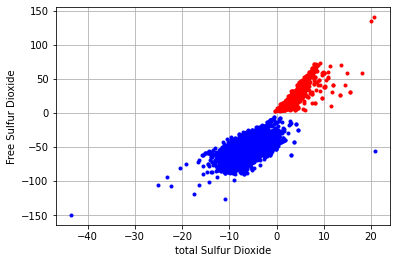

In [0]:
#Use PCA for visualization of  wine data

retained_variance_for_wine=visualize(X_red,Y_red, 'r', 'Total Sulfur Dioxide','Free Sulfur Dioxide')
print("Retained variance for Red wine dataset ",retained_variance_for_wine)

retained_variance_for_wine=visualize(X_white,Y_white,'b','total Sulfur Dioxide','Free Sulfur Dioxide')
print("Retained variance for White wine dataset ",retained_variance_for_wine)

Perform PCA on Data

In [0]:
def rmse(pred, label): 
    '''
    This is the root mean square error.
    Args:
        pred: numpy array of length N * 1, the prediction of labels
        label: numpy array of length N * 1, the ground truth of labels
    Return:
        a float value
    '''
    dif = pred - label
    dif = dif**2
    dif = dif/len(pred)
    sum_dif =sum(dif)
    return np.sqrt(sum_dif)


In [0]:
class LinearReg(object):
    @staticmethod 
    # static method means that you can use this method or function for any other classes, it is not specific to LinearReg
    def fit_closed(xtrain, ytrain):
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytrain: Nx1 numpy array, the true labels
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        x = xtrain.T  @ xtrain
        x = np.linalg.inv(x) @ xtrain.T 
        x = x @ ytrain
        return x

    def predict(xtest, weight):
        """
        Args:
            xtest: NxD numpy array, where N is number 
                   of instances and D is the dimensionality of each 
                   instance
            weight: Dx1 numpy array, the weights of linear regression model
        Return:
            prediction: Nx1 numpy array, the predicted labels
        """
        
        return xtest @ weight
        

In [0]:
class RidgeReg(LinearReg):

    @staticmethod
    def fit_closed(xtrain, ytrain, c_lambda):
      m,n = xtrain.shape
      I = np.eye((n))
      G = c_lambda * I
      G[0,0] = 0
      return (np.linalg.inv(xtrain.T @ xtrain + G) @ xtrain.T @ ytrain)
  


In [0]:
#apply PCA on the dataset and also find the number of linearly independent and intrinsic components 
def apply_PCA_on_data(X):
  """
  Args:
  X: NxD numpy array, where N is number 
          of instances and D is the dimensionality of each 
          instance
  Return:
  X_pca: pca reduced dataset
  independent_features: number of independent features 
  intrinsic_dimensions: number of intrinsic dimensions
  """
  
  U, s, VT = np.linalg.svd(X)
  k = intrinsic_dimension(s)
  proj = VT[:,0:k]
  data = X @ proj
  return data, num_linearly_ind_features(s), k

In [0]:
def apply_regression(X_train,y_train,X_test):
  """
  Args:
  X_train: training data without labels
  y_train: training labels
  X_test: test data 

  Return:
  y_pred: predicted labels
  """
  w = RidgeReg.fit_closed(X_train, y_train, c_lambda = 0)
  return X_test @ w

Cross Validation

In [0]:
def cross_validation(X, y, kfold, c_lambda):
    X_groups = np.split(X, kfold, axis = 0)
    Y_groups = np.split(y, kfold, axis = 0)
    r = 0
    for i in range(kfold):
      w = RidgeReg.fit_closed(X, y, c_lambda)
      y_pred = RidgeReg.predict(X_groups[i], w)
      r += rmse(y_pred, Y_groups[i])   
    return r/kfold     
    
X_redCV = X_red[:-9]
Y_redCV = Y_red[:-9]

best_lambda = None
best_error = None
kfold = 10
lambda_list = [0, 0.1, 1, 5, 10, 100, 1000]
for lm in lambda_list:
    err = cross_validation(X_redCV, Y_redCV, kfold, lm)
    print('lambda: %.2f' % lm, 'error: %.6f'% err)
    if best_error is None or err < best_error:
        best_error = err
        best_lambda = lm


print('best_lambda for Red Wine: %.2f' % best_lambda)
weight = RidgeReg.fit_closed(X_redCV, Y_redCV, c_lambda=10)
y_test_pred = RidgeReg.predict(X_redCV, weight)
test_rmse = rmse(y_test_pred, Y_redCV)
print('test rmse: %.4f' % test_rmse)


lambda: 0.00 error: 0.646135
lambda: 0.10 error: 0.646210
lambda: 1.00 error: 0.648945
lambda: 5.00 error: 0.654520
lambda: 10.00 error: 0.657310
lambda: 100.00 error: 0.677917
lambda: 1000.00 error: 0.704367
best_lambda for Red Wine: 0.00
test rmse: 0.6585


In [0]:
def cross_validation(X, y, kfold, c_lambda):
    X_groups = np.split(X, kfold, axis = 0)
    Y_groups = np.split(y, kfold, axis = 0)
    r = 0
    for i in range(kfold):
      w = RidgeReg.fit_closed(X, y, c_lambda)
      y_pred = RidgeReg.predict(X_groups[i], w)
      r += rmse(y_pred, Y_groups[i])   
    return r/kfold   

    
X_whiteCV = X_white[:-8]
Y_whiteCV = Y_white[:-8]

best_lambda = None
best_error = None
kfold = 10
lambda_list = [0, 0.1, 1, 5, 10, 100, 1000]
for lm in lambda_list:
    err = cross_validation(X_whiteCV, Y_whiteCV, kfold, lm)
    print('lambda: %.2f' % lm, 'error: %.6f'% err)
    if best_error is None or err < best_error:
        best_error = err
        best_lambda = lm


print('best_lambda for White Wine: %.2f' % best_lambda)
weight = RidgeReg.fit_closed(X_whiteCV, Y_whiteCV, c_lambda=10)
y_test_pred = RidgeReg.predict(X_whiteCV, weight)
test_rmse = rmse(y_test_pred, Y_whiteCV)
print('test rmse: %.4f' % test_rmse)


lambda: 0.00 error: 0.753389
lambda: 0.10 error: 0.753396
lambda: 1.00 error: 0.753554
lambda: 5.00 error: 0.754501
lambda: 10.00 error: 0.755552
lambda: 100.00 error: 0.767648
lambda: 1000.00 error: 0.786491
best_lambda for White Wine: 0.00
test rmse: 0.7577


PCA For every Group red Wine

In [0]:
X_red_ratings = [[]]
Y_red_ratings = [[]]
for i in range(10):
  X_red_ratings.append([])
  Y_red_ratings.append([])

for i in range(len(Y_red)):
  rating = int(Y_red[i])
  X_red_ratings[rating].append(X_red[i])
  Y_red_ratings[rating].append(Y_red[i])

X_red_ratings = np.asarray(X_red_ratings)
Y_red_ratings = np.asarray(Y_red_ratings)

for i in range(10):
  if(len(X_red_ratings[i]) > 0):
    X_PCA, ind_features, intrinsic_dimensions = apply_PCA_on_data(X_red_ratings[i])
    print("data shape with PCA ",X_PCA.shape)
    print("Number of independent features ",ind_features)
    print("Number of intrinsic components ",intrinsic_dimensions)

    #get training and testing data 
    X_train=X_PCA[:int(0.8*len(X_PCA)),:]
    y_train=np.asarray(Y_red_ratings[i])[:int(0.8*len(X_PCA))].reshape(-1,1)
    X_test=X_PCA[int(0.8*len(X_PCA)):]
    y_test=np.asarray(Y_red_ratings[i])[int(0.8*len(X_PCA)):].reshape(-1,1)

    #use Ridge Regression for getting predcited labels
    y_pred=apply_regression(X_train,y_train,X_test)

    #calculate RMSE 
    rmse_score = rmse(y_pred, y_test)
    print("rmse of Red Wine score with PCA for group: ",i + 1,rmse_score)
    i += 1
    avg += rmse_score
print("Average rmse: ", avg/i)



(10,)
data shape with PCA  (10, 5)
Number of independent features  10
Number of intrinsic components  5
rmse of Red Wine score with PCA for group:  4 [0.31218574]


NameError: ignored

Whtie

In [0]:
X_white_ratings = [[]]
Y_white_ratings = [[]]
for i in range(10):
  X_white_ratings.append([])
  Y_white_ratings.append([])

for i in range(len(Y_red)):
  rating = int(Y_red[i])
  X_white_ratings[rating].append(X_white[i])
  Y_white_ratings[rating].append(Y_white[i])

X_white_ratings = np.asarray(X_white_ratings)
Y_white_ratings = np.asarray(Y_white_ratings)
avg = 0
l = 0

for i in range(10):
  if(len(X_white_ratings[i]) > 0):
    X_PCA, ind_features, intrinsic_dimensions = apply_PCA_on_data(X_white_ratings[i])
    print("data shape with PCA ",X_PCA.shape)
    print("Number of independent features ",ind_features)
    print("Number of intrinsic components ",intrinsic_dimensions)

    #get training and testing data 
    X_train=X_PCA[:int(0.8*len(X_PCA)),:]
    y_train=np.asarray(Y_white_ratings[i])[:int(0.8*len(X_PCA))].reshape(-1,1)
    X_test=X_PCA[int(0.8*len(X_PCA)):]
    y_test=np.asarray(Y_white_ratings[i])[int(0.8*len(X_PCA)):].reshape(-1,1)

    #use Ridge Regression for getting predcited labels
    y_pred=apply_regression(X_train,y_train,X_test)

    #calculate RMSE 
    rmse_score = rmse(y_pred, y_test)
    print("rmse of White Wine score with PCA for group: ",i + 1,rmse_score)
    l += 1
    avg += rmse_score
print("Average rmse: ", avg/l)
    

(10,)
data shape with PCA  (10, 4)
Number of independent features  10
Number of intrinsic components  4
rmse of White Wine score with PCA for group:  4 [1.34738746]
(11,)
data shape with PCA  (53, 4)
Number of independent features  11
Number of intrinsic components  4
rmse of White Wine score with PCA for group:  5 [1.34942091]
(11,)
data shape with PCA  (681, 4)
Number of independent features  11
Number of intrinsic components  4
rmse of White Wine score with PCA for group:  6 [0.97046762]
(11,)
data shape with PCA  (638, 4)
Number of independent features  11
Number of intrinsic components  4
rmse of White Wine score with PCA for group:  7 [0.77471096]
(11,)
data shape with PCA  (199, 4)
Number of independent features  11
Number of intrinsic components  4
rmse of White Wine score with PCA for group:  8 [0.92795544]
(11,)
data shape with PCA  (18, 4)
Number of independent features  11
Number of intrinsic components  4
rmse of White Wine score with PCA for group:  9 [1.76688812]
Average

In [0]:
#load the dataset 


X_PCA, ind_features, intrinsic_dimensions = apply_PCA_on_data(X_red)
print("data shape with PCA ",X_PCA.shape)
print("Number of independent features ",ind_features)
print("Number of intrinsic components ",intrinsic_dimensions)

#get training and testing data 
X_train=X_PCA[:int(0.8*len(X_PCA)),:]
y_train=Y_red[:int(0.8*len(X_PCA))].reshape(-1,1)
X_test=X_PCA[int(0.8*len(X_PCA)):]
y_test=Y_red[int(0.8*len(X_PCA)):].reshape(-1,1)

#use Ridge Regression for getting predcited labels
y_pred=apply_regression(X_train,y_train,X_test)

#calculate RMSE 
rmse_score = rmse(y_pred, y_test)
print("rmse of Red Wine score with PCA",rmse_score)


(11,)
data shape with PCA  (1599, 6)
Number of independent features  11
Number of intrinsic components  6
rmse of Red Wine score with PCA [0.82285788]


In [0]:
#Ridge regression without PCA
X_train=X_red[:int(0.8*len(X_red)),:]
y_train=Y_red[:int(0.8*len(X_red))].reshape(-1,1)
X_test=X_red[int(0.8*len(X_red)):]
y_test=Y_red[int(0.8*len(X_red)):].reshape(-1,1)

#use Ridge Regression for getting predcited labels
y_pred=apply_regression(X_train,y_train,X_test)

#calculate RMSE 
print(X_train.shape)
rmse_score = rmse(y_pred, y_test)
print("rmse score of Red Wine without PCA",rmse_score)

(1279, 11)
rmse score of Red Wine without PCA [0.65692807]


In [0]:
#load the dataset 
X_PCA, ind_features, intrinsic_dimensions = apply_PCA_on_data(X_white)
print("data shape with PCA ",X_PCA.shape)
print("Number of independent features ",ind_features)
print("Number of intrinsic components ",intrinsic_dimensions)

#get training and testing data 
X_train=X_PCA[:int(0.8*len(X_PCA)),:]
y_train=Y_white[:int(0.8*len(X_PCA))].reshape(-1,1)
X_test=X_PCA[int(0.8*len(X_PCA)):]
y_test=Y_white[int(0.8*len(X_PCA)):].reshape(-1,1)

#use Ridge Regression for getting predcited labels
y_pred=apply_regression(X_train,y_train,X_test)

#calculate RMSE 
rmse_score = rmse(y_pred, y_test)
print("rmse of White Wine score with PCA",rmse_score)


(11,)
data shape with PCA  (4898, 4)
Number of independent features  11
Number of intrinsic components  4
rmse of White Wine score with PCA [0.83946337]


In [0]:
#Ridge regression without PCA
X_train=X_white[:int(0.8*len(X_white)),:]
y_train=Y_white[:int(0.8*len(X_white))].reshape(-1,1)
X_test=X_white[int(0.8*len(X_white)):]
y_test=Y_white[int(0.8*len(X_white)):].reshape(-1,1)

#use Ridge Regression for getting predcited labels
y_pred=apply_regression(X_train,y_train,X_test)

#calculate RMSE 
print(X_train.shape)
rmse_score = rmse(y_pred, y_test)
print("rmse score of White Wine without PCA",rmse_score)

(3918, 11)
rmse score of White Wine without PCA [0.71521091]


Classifying Wines

[2 0 0 0 2 0 0 2 2 1 0 1 0 2 1 1 1 0 2 0]
Ratings and Centers Per Column
[458, 226, 915]
[5.554585152838428, 5.29646017699115, 5.760655737704918]
[[  3.93742071   7.02525523   1.90907814]
 [ 24.23076328  50.17357927   9.94857379]
 [-15.33230261 -35.24603857  -4.21173222]]


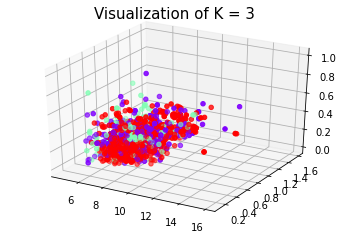

In [0]:

#Bad Wine 0-4
#Good Wine 5-6
#Great Wine 7+


U, s, VT = np.linalg.svd(X_red)
proj = VT[:,0:3]
data = X_red @ proj

k = 3
kmeans = KMeans(k, random_state=0).fit(data)
#kmeans.predict(data[0]
predictions = kmeans.fit_predict(data)
print(predictions[0:20])
cluster_labels = kmeans.labels_

clusters = [0] * k
len_clusters = [0] * k

for i in range(len(predictions)):
  clusters[predictions[i]] += Y_red[i]
  len_clusters[predictions[i]] += 1

for i in range(len(clusters)):
  clusters[i] = clusters[i]/len_clusters[i]


print("Ratings and Centers Per Column")
print(len_clusters)
print(clusters)
print(kmeans.cluster_centers_.T)

def visualise(X, C, K):#Visualization of clustering. You don't need to change this function   
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=C,cmap='rainbow')
    plt.title('Visualization of K = '+str(K), fontsize=15)
    plt.show()
    pass
visualise(X_red, kmeans.labels_,k)

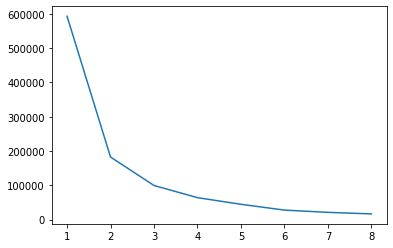

In [0]:
def find_optimal_num_clusters():
    """Plots loss values for different number of clusters in K-Means
    Args:
        points: input points of candies
        overall_rating: numpy array of length N x 1, the rating for each point
        max_K: number of clusters
    Return:
        None (plot loss values against number of clusters)
    """
    
    losses = []
    for k in range(1, 9):
       kmeans = KMeans(k, random_state=0).fit(data)
       loss = kmeans.inertia_
       losses.append(loss)
    plt.plot(range(1, 9), losses)
    plt.show()
find_optimal_num_clusters()
    

**Trees**

In [0]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [0]:
def entropy(class_y):
    
    ones = sum(class_y)/len(class_y)
    zeros = 1 - ones
    
    if ones != 0:
      o = -ones * log2(ones)
    else:
      o = 0
    if zeros != 0:
      z = zeros * log2(zeros)
    else:
      z = 0
    return o - z

def information_gain(previous_y, current_y): 
    e = []
    a = 0
    for split in current_y:
      a += len(split)
      if(len(split) > 0):
        e.append(len(split) * entropy(split))
    return entropy(previous_y) - sum(e)/(a)

def partition_classes(X, y, split_attribute, split_val):
       
    if(isinstance(X[0][split_attribute], int)):
      s = int(split_val)
      b = np.asarray(X)
      b = np.asarray(b[:,split_attribute], dtype = int)
      idx = b <= s
      idx1 = b > s
      X_left =  np.asarray(X, dtype='O')[idx]
      X_right =  np.asarray(X, dtype='O')[idx1]
      Y_left =  np.asarray(y)[idx]
      Y_right =  np.asarray(y)[idx1]
      return X_left, X_right, Y_left,Y_right
    else:
      b = np.asarray(X)
      b = np.asarray(b[:,split_attribute])
      idx = b == split_val
      idx1 = b != split_val
      X_left =  np.asarray(X, dtype='O')[idx]
      X_right =  np.asarray(X, dtype='O')[idx1]
      Y_left =  np.asarray(y)[idx]
      Y_right =  np.asarray(y)[idx1]
      return X_left, X_right, Y_left,Y_right


def find_best_split(X, y, split_attribute):
    
    possible_splits = np.unique(np.asarray(X)[:,split_attribute])
    best = 0
    opt = 0
    starting = entropy(y)
    for val in possible_splits:
      
      X_left, X_right, Y_left,Y_right = partition_classes(X,y,split_attribute,val) 
      current_y = [Y_left, Y_right]
      ig = information_gain(y, current_y)
      if ig > best:
        best = ig
        opt = val
    return opt, best
  

def find_best_feature(X, y):
    
    best_ig = 0
    best_val = 0
    feature = 0
    for i in range(np.asarray(X).shape[1]):
      opt, ig = find_best_split(X, y, i)
      if ig > best_ig:
        best_ig = ig 
        best_val = opt
        feature = i
      if(ig == best_ig):
        if np.random.randint(0,2) > 0:
          best_ig = ig 
          best_val = opt
          feature = i
    print(feature)
    return feature, best_val



class MyDecisionTree(object):
    def __init__(self, max_depth=None):
        
        self.tree = {}
        self.root = None
        self.max_depth = max_depth


    def fit(self, X, y, depth):
        
        if depth == self.max_depth:
          node = {'isLeaf': True, 'class': round(sum(y)/len(y))}
          return node
        if len(np.unique(y)) == 1:
          node = {'isLeaf': True, 'class': y[0]}
          return node
        
        best_feature, best_split_val = find_best_feature(X, y)
        X_left, X_right, Y_left,Y_right = partition_classes(X,y, best_feature, best_split_val)
        leftTree = self.fit(X_left, Y_left, depth + 1)
        rightTree = self.fit(X_right, Y_right, depth + 1)
        is_categorical = not isinstance(X[0][best_feature], int)
        node = {
            'isLeaf': False,
            'split_attribute': best_feature,
            'is_categorical': is_categorical,
            'split_value': best_split_val,
            'leftTree': leftTree,
            'rightTree': rightTree
        }
        self.root = node
        return node

        
        
       
    def predict(self, record):
        
        current_node = self.root
        while(not current_node['isLeaf']):
          split_attribute = current_node['split_attribute']
          split_value = current_node['split_value']
          if not current_node['is_categorical']:
            if int(record[split_attribute]) <= int(split_value):
              current_node = current_node['leftTree']
            else:
              current_node = current_node['rightTree']
          else:
            if record[split_attribute] == split_value:
              current_node = current_node['leftTree']
            else:
              current_node = current_node['rightTree']
        return current_node['class']


def DecisionTreeEvalution(dt,X,y, verbose=False):

    # Make predictions
    # For each test sample X, use our fitting dt classifer to predict
    y_predicted = []
    for record in X: 
        y_predicted.append(dt.predict(record))

    # Comparing predicted and true labels
    results = [prediction == truth for prediction, truth in zip(y_predicted, y)]

    # Accuracy
    accuracy = float(results.count(True)) / float(len(results))
    if verbose:
        print("accuracy: %.4f" % accuracy)
    return accuracy




In [0]:
data_test = pd.read_csv("RedWineTest.csv")
data_train = pd.read_csv("RedWineTrain.csv")


X_train = np.array(data_train)[:,:-2]
print(X_train.shape)
y_train = np.array(data_train)[:,-1]
X_test = np.array(data_test)[:,:-2]
y_test = np.array(data_test)[:,-1]

(1279, 11)


In [0]:
# Initializing a decision tree.
max_depth = 7
dt = MyDecisionTree(max_depth)

# Building a tree
print("fitting the decision tree")
dt.fit(X_train, y_train, 0)

fitting the decision tree
10
10
7
8
8
10
1
2
10
8
2
10
9
9
10
1


{'isLeaf': False,
 'is_categorical': True,
 'leftTree': {'class': 0.0, 'isLeaf': True},
 'rightTree': {'isLeaf': False,
  'is_categorical': True,
  'leftTree': {'isLeaf': False,
   'is_categorical': True,
   'leftTree': {'isLeaf': False,
    'is_categorical': True,
    'leftTree': {'class': 1.0, 'isLeaf': True},
    'rightTree': {'isLeaf': False,
     'is_categorical': True,
     'leftTree': {'class': 1.0, 'isLeaf': True},
     'rightTree': {'class': 0.0, 'isLeaf': True},
     'split_attribute': 8,
     'split_value': 3.38},
    'split_attribute': 8,
    'split_value': 3.36},
   'rightTree': {'class': 0.0, 'isLeaf': True},
   'split_attribute': 7,
   'split_value': 0.9968},
  'rightTree': {'isLeaf': False,
   'is_categorical': True,
   'leftTree': {'class': 0.0, 'isLeaf': True},
   'rightTree': {'isLeaf': False,
    'is_categorical': True,
    'leftTree': {'isLeaf': False,
     'is_categorical': True,
     'leftTree': {'class': 0.0, 'isLeaf': True},
     'rightTree': {'isLeaf': False,


In [0]:
DecisionTreeEvalution(dt,X_test,y_test, True)

accuracy: 0.9062


0.90625

In [0]:
data_test = pd.read_csv("WhiteWineTest.csv")
data_train = pd.read_csv("WhiteWineTrain.csv")


X_train = np.array(data_train)[:,:-2]
print(X_train.shape)
y_train = np.array(data_train)[:,-1]
X_test = np.array(data_test)[:,:-2]
y_test = np.array(data_test)[:,-1]

(3917, 10)


In [0]:
# Initializing a decision tree.
max_depth = 7
dt = MyDecisionTree(max_depth)

# Building a tree
print("fitting the decision tree")
dt.fit(X_train, y_train, 0)

fitting the decision tree
9
4
2
6
8
6
1
9
0
7
7
7
8
9
1
7
6
8
7
1
9
0
9
8
4
8
9
7
9


{'isLeaf': False,
 'is_categorical': True,
 'leftTree': {'isLeaf': False,
  'is_categorical': True,
  'leftTree': {'class': 1.0, 'isLeaf': True},
  'rightTree': {'isLeaf': False,
   'is_categorical': True,
   'leftTree': {'class': 1.0, 'isLeaf': True},
   'rightTree': {'isLeaf': False,
    'is_categorical': True,
    'leftTree': {'class': 1.0, 'isLeaf': True},
    'rightTree': {'isLeaf': False,
     'is_categorical': True,
     'leftTree': {'class': 1.0, 'isLeaf': True},
     'rightTree': {'isLeaf': False,
      'is_categorical': True,
      'leftTree': {'class': 1.0, 'isLeaf': True},
      'rightTree': {'isLeaf': False,
       'is_categorical': True,
       'leftTree': {'class': 1.0, 'isLeaf': True},
       'rightTree': {'class': 0.0, 'isLeaf': True},
       'split_attribute': 1,
       'split_value': 0.37},
      'split_attribute': 6,
      'split_value': 0.99566},
     'split_attribute': 8,
     'split_value': 0.58},
    'split_attribute': 6,
    'split_value': 0.995},
   'split_att

In [0]:
DecisionTreeEvalution(dt,X_test,y_test, True)

accuracy: 0.7102


0.710204081632653

In [0]:
data = np.array(pd.read_csv("Wine.csv"))

idx = np.arange(data.shape[0]).tolist()
idxs = []
for i in range(int(len(idx) * .8)):
  choice = np.random.choice(idx)
  idx.remove(choice)
  idxs.append(choice) 




X_train = np.array(data)[idxs,:-2]
print(X_train.shape)
y_train = np.array(data)[idxs,-1]
X_test = np.array(data)[idx,:-2]
y_test = np.array(data)[idx,-1]

(5197, 11)


In [0]:
# Initializing a decision tree.
max_depth = 7
dt = MyDecisionTree(max_depth)

# Building a tree
print("fitting the decision tree")
dt.fit(X_train, y_train, 0)

fitting the decision tree
10
3
3
7
10
7
10
2
9
8
8
7
6
10
0
8
9
4
10
2
4
10
3
10


{'isLeaf': False,
 'is_categorical': True,
 'leftTree': {'isLeaf': False,
  'is_categorical': True,
  'leftTree': {'class': 1.0, 'isLeaf': True},
  'rightTree': {'isLeaf': False,
   'is_categorical': True,
   'leftTree': {'isLeaf': False,
    'is_categorical': True,
    'leftTree': {'class': 1.0, 'isLeaf': True},
    'rightTree': {'class': 0.0, 'isLeaf': True},
    'split_attribute': 7,
    'split_value': 0.9984},
   'rightTree': {'class': 0.0, 'isLeaf': True},
   'split_attribute': 3,
   'split_value': 11.1},
  'split_attribute': 3,
  'split_value': 4.6},
 'rightTree': {'isLeaf': False,
  'is_categorical': True,
  'leftTree': {'isLeaf': False,
   'is_categorical': True,
   'leftTree': {'class': 1.0, 'isLeaf': True},
   'rightTree': {'class': 0.0, 'isLeaf': True},
   'split_attribute': 7,
   'split_value': 1.00005},
  'rightTree': {'isLeaf': False,
   'is_categorical': True,
   'leftTree': {'isLeaf': False,
    'is_categorical': True,
    'leftTree': {'isLeaf': False,
     'is_categori

In [0]:
DecisionTreeEvalution(dt,X_test,y_test, True)

accuracy: 0.8031


0.803076923076923

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
